# HDI - highest density interval

* 黒木玄
* 2022-08-06～2022-08-11
* License: https://opensource.org/licenses/MIT

2022-08-11: [古いバージョン](https://github.com/genkuroki/public/blob/7ebc143b3280171fa81f5cb6a28502bc80f4bd1d/0034/HDI%20-%20highest%20density%20interval.ipynb)の `hdi(dist, α)` (Roots.jlを使うバージョン)はかなり不安定.  Optim.jl を使うよりシンプルな方法に切り替えた.  

In [1]:
using Distributions
using Optim
using StatsPlots
default(fmt=:png, size=(400, 250), titlefontsize=10)

In [2]:
"""
    hdi(dist::ContinuousUnivariateDistribution, α = 0.05; alg = Brent())

returns the 100(1 - `α`)% highest density interval (HDI) of the distribution `dist`.

Assumption: `dist` is a unimodal continuous univariate distribution.
"""
function hdi(dist::ContinuousUnivariateDistribution, α = 0.05; alg = Brent())
    f(p) = quantile(dist, p + (1 - α)) - quantile(dist, p)
    o = optimize(f, 0, α, alg)
    p = o.minimizer
    quantile.(dist, (p, p + (1 - α)))
end

@doc hdi

```
hdi(dist::ContinuousUnivariateDistribution, α = 0.05; alg = Brent())
```

returns the 100(1 - `α`)% highest density interval (HDI) of the distribution `dist`.

Assumption: `dist` is a unimodal continuous univariate distribution.


In [3]:
function plot_hdi(dist, α = 0.05; kwargs...)
    @show α
    @show a, b = hdi(dist, α)
    plot(dist; label="")
    vline!([a, b]; label="", ls=:dash)
    title!("HDI of $dist")
    plot!(; kwargs...)
end

plot_hdi (generic function with 2 methods)

α = 0.05
(a, b) = hdi(dist, α) = (-1.9599639781660514, 1.9599639909140643)


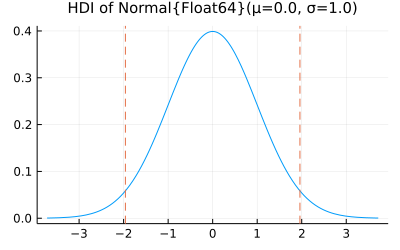

In [4]:
plot_hdi(Normal())

α = 0.05
(a, b) = hdi(dist, α) = (3.620880317063121, 28.290650958751876)


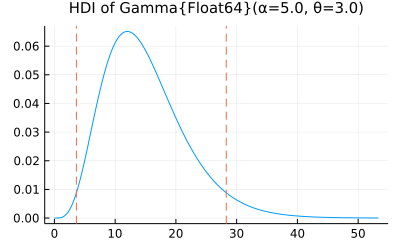

In [5]:
plot_hdi(Gamma(5, 3))

α = 0.05
(a, b) = hdi(dist, α) = (2.7546114115633656e-16, 2.9957322735539944)


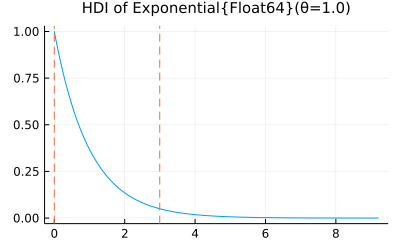

In [6]:
plot_hdi(Exponential())

α = 0.05
(a, b) = hdi(dist, α) = (0.02609150123277824, 5.186948401949592)


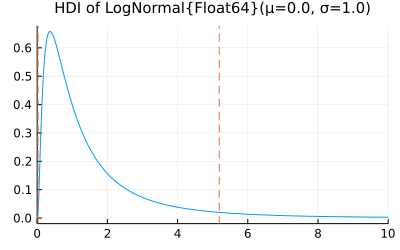

In [7]:
plot_hdi(LogNormal(); xlim=(0, 10))

α = 0.05
(a, b) = hdi(dist, α) = (0.11458418802542714, 0.5639440158829079)


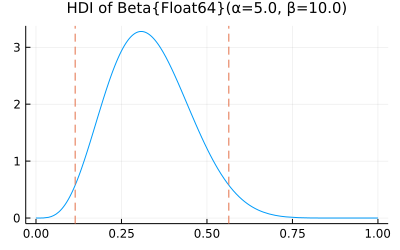

In [8]:
plot_hdi(Beta(5, 10))

α = 0.05
(a, b) = hdi(dist, α) = (0.5492802699994888, 0.9999999998494784)


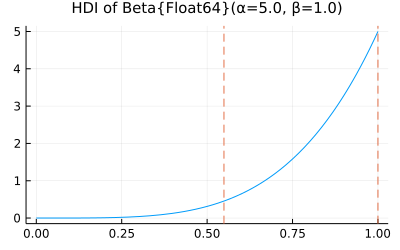

In [9]:
plot_hdi(Beta(5, 1); legend=:topleft)